<a href="https://colab.research.google.com/github/Chiozen/desafio_alura_latam_data_analysis/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [ ]:
import pandas as pd
import unicodedata
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Configuración de visualización inteligente
# Esta función elimina decimales si son .0, pero los mantiene si tienen valor (útil para lat/lon)
pd.options.display.float_format = lambda x: '{:,.0f}'.format(x) if x == int(x) else '{:,.4f}'.format(x)

# 2. Definición de URLs
urls = {
    "Tienda 1": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv",
    "Tienda 2": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv",
    "Tienda 3": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv",
    "Tienda 4": "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"
}

# 3. Función de normalización de columnas
def normalizar_columnas(df):
    def limpiar(texto):
        texto = str(texto).strip()
        texto = ''.join(c for c in unicodedata.normalize('NFD', texto) if unicodedata.category(c) != 'Mn')
        return texto.lower().replace(" ", "_")

    df.columns = [limpiar(col) for col in df.columns]
    return df

# 4. Carga y preparación
tienda1 = normalizar_columnas(pd.read_csv(urls["Tienda 1"]))
tienda2 = normalizar_columnas(pd.read_csv(urls["Tienda 2"]))
tienda3 = normalizar_columnas(pd.read_csv(urls["Tienda 3"]))
tienda4 = normalizar_columnas(pd.read_csv(urls["Tienda 4"]))

tiendas = {
    "Tienda 1": tienda1,
    "Tienda 2": tienda2,
    "Tienda 3": tienda3,
    "Tienda 4": tienda4
}

print("¡Carga exitosa!")
print("Se aplicó un formato numérico dinámico para proteger la precisión de las coordenadas.")
display(tienda1.head())

¡Carga exitosa!
Se aplicó un formato numérico dinámico para proteger la precisión de las coordenadas.


,producto,categoria_del_producto,precio,costo_de_envio,fecha_de_compra,vendedor,lugar_de_compra,calificacion,metodo_de_pago,cantidad_de_cuotas,lat,lon
0,Asistente virtual,Electrónicos,"164,300","6,900",16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.6097,-74.0817
1,Mesa de comedor,Muebles,"192,300","8,400",18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.2518,-75.5636
2,Juego de mesa,Juguetes,"209,600","15,900",15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.3997,-75.5144
3,Microondas,Electrodomésticos,"757,500","41,000",03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.4372,-76.5225
4,Silla de oficina,Muebles,"335,200","20,200",07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.2518,-75.5636


#1. Análisis de facturación



/tmp/ipython-input-1436866377.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Tienda", y="Facturacion_Total", data=df_fact, palette=colores)


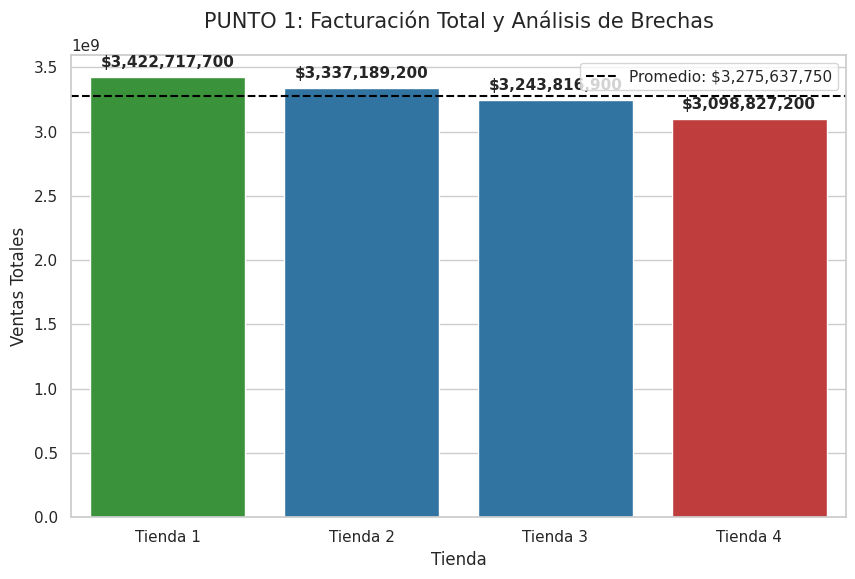

--- POSICIONAMIENTO DE TIENDAS ---


,Tienda,Facturacion_Total
0,Tienda 1,"3,422,717,700"
1,Tienda 2,"3,337,189,200"
2,Tienda 3,"3,243,816,900"
3,Tienda 4,"3,098,827,200"



--- ANÁLISIS ESTRATÉGICO DE DIFERENCIAS (GAPS) ---


,Métrica,Valor
0,Venta Máxima,"3,422,717,700"
1,Venta Mínima,"3,098,827,200"
2,Brecha (Rango),"323,890,500"
3,Promedio del Grupo,"3,275,637,750"


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Configuración de estilo
sns.set_theme(style="whitegrid")

# 2. Procesamiento de Facturación con búsqueda flexible de columnas
datos_facturacion = []

for nombre, df in tiendas.items():
    # Buscamos las columnas que contienen 'precio' y 'cantidad' sin importar el resto del nombre
    col_precio = [c for c in df.columns if 'precio' in c][0]
    col_cantidad = [c for c in df.columns if 'cantidad' in c][0]

    # Calculamos la facturación total
    facturacion_total = (df[col_precio] * df[col_cantidad]).sum()
    datos_facturacion.append({"Tienda": nombre, "Facturacion_Total": facturacion_total})

# Crear DataFrame resumen
df_fact = pd.DataFrame(datos_facturacion).sort_values(by="Facturacion_Total", ascending=False)

# 3. Cálculos Estadísticos
max_venta = df_fact["Facturacion_Total"].max()
min_venta = df_fact["Facturacion_Total"].min()
promedio_grupo = df_fact["Facturacion_Total"].mean()
brecha_total = max_venta - min_venta

# 4. Visualización de Brechas
plt.figure(figsize=(10, 6))
colores = ['#2ca02c' if x == max_venta else '#d62728' if x == min_venta else '#1f77b4' for x in df_fact['Facturacion_Total']]

ax = sns.barplot(x="Tienda", y="Facturacion_Total", data=df_fact, palette=colores)
plt.axhline(promedio_grupo, color='black', linestyle='--', label=f'Promedio: ${promedio_grupo:,.0f}')

# Etiquetas sobre las barras
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=11, fontweight='bold', xytext=(0, 5),
                textcoords='offset points')

plt.title("PUNTO 1: Facturación Total y Análisis de Brechas", fontsize=15, pad=20)
plt.ylabel("Ventas Totales")
plt.legend()
plt.show()

# 5. Tablas de Resultados
print("--- POSICIONAMIENTO DE TIENDAS ---")
display(df_fact)
print("\n--- ANÁLISIS ESTRATÉGICO DE DIFERENCIAS (GAPS) ---")
metricas = pd.DataFrame({
    "Métrica": ["Venta Máxima", "Venta Mínima", "Brecha (Rango)", "Promedio del Grupo"],
    "Valor": [max_venta, min_venta, brecha_total, promedio_grupo]
})
display(metricas)

# 2. Ventas por categoría

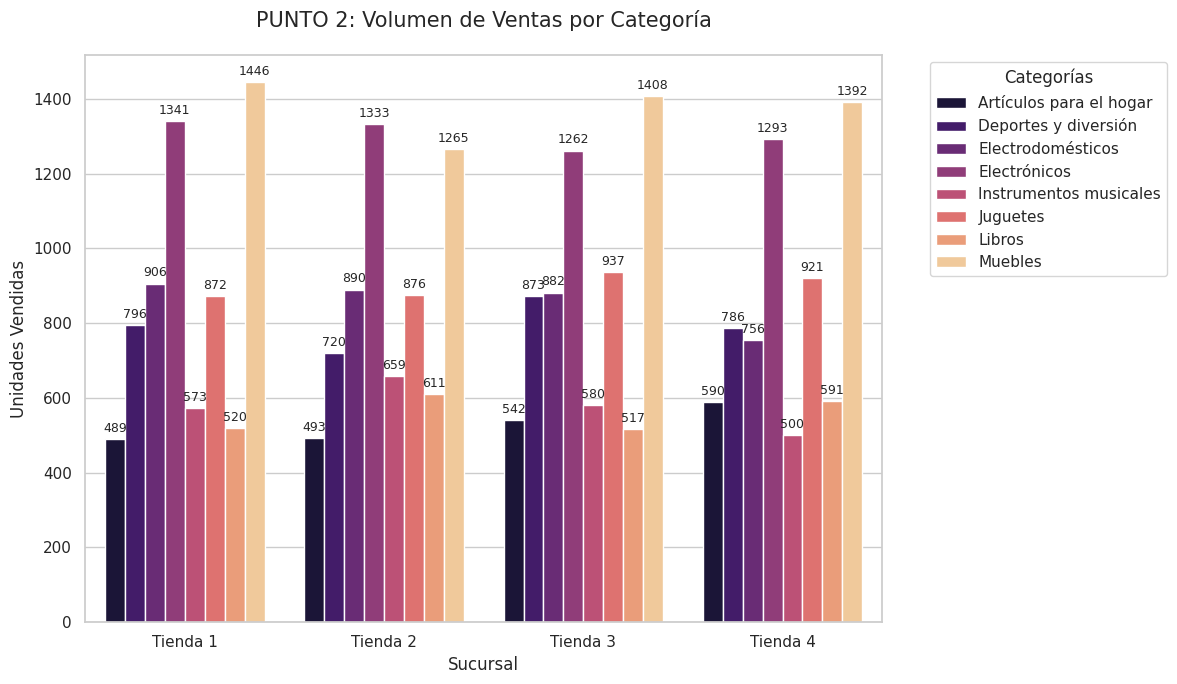

--- MATRIZ DE COMPARACIÓN POR CATEGORÍA ---


categoria_del_producto,Artículos para el hogar,Deportes y diversión,Electrodomésticos,Electrónicos,Instrumentos musicales,Juguetes,Libros,Muebles
Tienda,,,,,,,,
Tienda 1,489,796,906,1341,573,872,520,1446
Tienda 2,493,720,890,1333,659,876,611,1265
Tienda 3,542,873,882,1262,580,937,517,1408
Tienda 4,590,786,756,1293,500,921,591,1392



--- CATEGORÍA LÍDER POR TIENDA ---


,Categoría Estrella,Ventas Máximas
Tienda,,
Tienda 1,Muebles,1446
Tienda 3,Muebles,1408
Tienda 4,Muebles,1392
Tienda 2,Electrónicos,1333


In [ ]:
# 1. Configuración de estilo
sns.set_theme(style="whitegrid")

# 2. Procesamiento de Categorías con búsqueda flexible
datos_categorias = []

for nombre, df in tiendas.items():
    # Buscamos las columnas de categoría y cantidad
    col_cat = [c for c in df.columns if 'categoria' in c][0]
    col_cant = [c for c in df.columns if 'cantidad' in c][0]

    # Agrupamos por categoría y sumamos las cantidades
    resumen_cat = df.groupby(col_cat)[col_cant].sum().reset_index()
    resumen_cat['Tienda'] = nombre
    datos_categorias.append(resumen_cat)

# Unificamos en un solo DataFrame
df_cat_final = pd.concat(datos_categorias)

# 3. Creación de la MATRIZ DE COMPARACIÓN (Pivot Table)
matriz_cat = df_cat_final.pivot(index='Tienda', columns=col_cat, values=col_cant).fillna(0)

# 4. Visualización Gráfica
plt.figure(figsize=(12, 7))
ax = sns.barplot(data=df_cat_final, x='Tienda', y=col_cant, hue=col_cat, palette="magma")

plt.title("PUNTO 2: Volumen de Ventas por Categoría", fontsize=15, pad=20)
plt.ylabel("Unidades Vendidas")
plt.xlabel("Sucursal")
plt.legend(title="Categorías", bbox_to_anchor=(1.05, 1), loc='upper left')

# Etiquetas de datos (enteros)
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='bottom', fontsize=9, xytext=(0, 3),
                    textcoords='offset points')

plt.tight_layout()
plt.show()

# 5. Tablas de Resultados
print("--- MATRIZ DE COMPARACIÓN POR CATEGORÍA ---")
display(matriz_cat)

print("\n--- CATEGORÍA LÍDER POR TIENDA ---")
resumen_lider = pd.DataFrame({
    'Categoría Estrella': matriz_cat.idxmax(axis=1),
    'Ventas Máximas': matriz_cat.max(axis=1)
}).sort_values(by='Ventas Máximas', ascending=False)
display(resumen_lider)

# 3. Calificación promedio de la tienda


/tmp/ipython-input-2845146868.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Tienda", y="Calificacion_Promedio", data=df_eval, palette=colores)


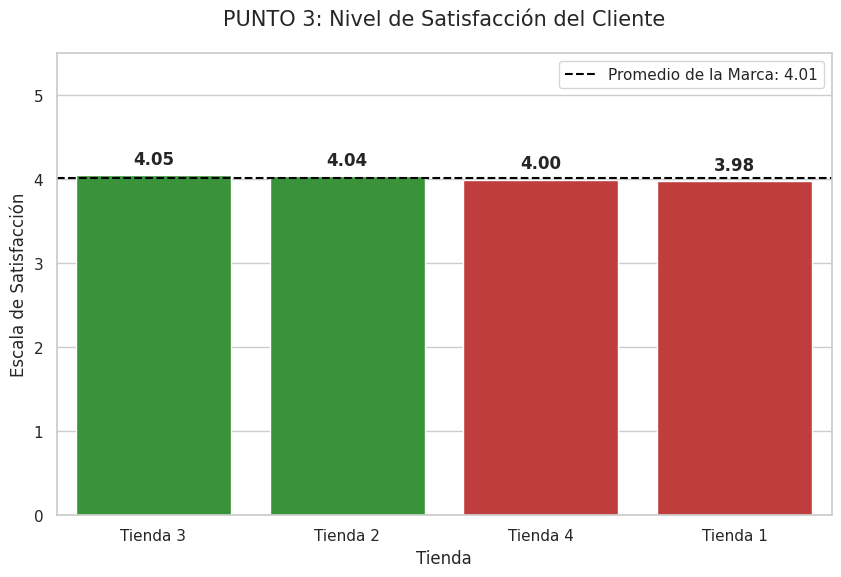

--- ANÁLISIS DE REPUTACIÓN POR TIENDA ---


,Tienda,Calificacion_Promedio,Punto_Mas_Alto,Punto_Mas_Bajo
2,Tienda 3,4.0483,5,1
1,Tienda 2,4.0373,5,1
3,Tienda 4,3.9958,5,1
0,Tienda 1,3.9767,5,1


In [ ]:
# 1. Configuración de estilo
sns.set_theme(style="whitegrid")

# 2. Procesamiento de Evaluaciones con búsqueda "A prueba de balas"
datos_evaluacion = []
palabras_clave = ['evaluacion', 'puntuacion', 'rating', 'puntos', 'nota', 'score']

for nombre, df in tiendas.items():
    # Buscamos la columna de evaluación de forma más amplia
    col_eval = None
    for c in df.columns:
        if any(palabra in c.lower() for palabra in palabras_clave):
            col_eval = c
            break

    # Si aún no la encuentra, tomamos la columna que tenga valores entre 1 y 5 (típico de ratings)
    if not col_eval:
        for c in df.columns:
            if df[c].dtype in ['float64', 'int64'] and df[c].max() <= 10:
                col_eval = c
                break

    if col_eval:
        promedio = df[col_eval].mean()
        datos_evaluacion.append({
            "Tienda": nombre,
            "Calificacion_Promedio": promedio,
            "Punto_Mas_Alto": df[col_eval].max(),
            "Punto_Mas_Bajo": df[col_eval].min()
        })

df_eval = pd.DataFrame(datos_evaluacion).sort_values(by="Calificacion_Promedio", ascending=False)

# 3. Cálculos de Brecha
promedio_global = df_eval["Calificacion_Promedio"].mean()

# 4. Visualización de Satisfacción
plt.figure(figsize=(10, 6))
colores = ['#2ca02c' if x >= promedio_global else '#d62728' for x in df_eval['Calificacion_Promedio']]
ax = sns.barplot(x="Tienda", y="Calificacion_Promedio", data=df_eval, palette=colores)

plt.axhline(promedio_global, color='black', linestyle='--', label=f'Promedio de la Marca: {promedio_global:.2f}')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, fontweight='bold', xytext=(0, 5), textcoords='offset points')

plt.title("PUNTO 3: Nivel de Satisfacción del Cliente", fontsize=15, pad=20)
plt.ylim(0, 5.5)
plt.ylabel("Escala de Satisfacción")
plt.legend()
plt.show()

# 5. Tabla de Resultados
print("--- ANÁLISIS DE REPUTACIÓN POR TIENDA ---")
display(df_eval)

# 4. Productos más y menos vendidos

--- INICIANDO ANÁLISIS DETALLADO (Columna de volumen: costo_de_envio) ---



/tmp/ipython-input-1645513373.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5, x=col_cant, y=col_prod, ax=axes[0], palette="viridis")
/tmp/ipython-input-1645513373.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bot_5, x=col_cant, y=col_prod, ax=axes[1], palette="flare")


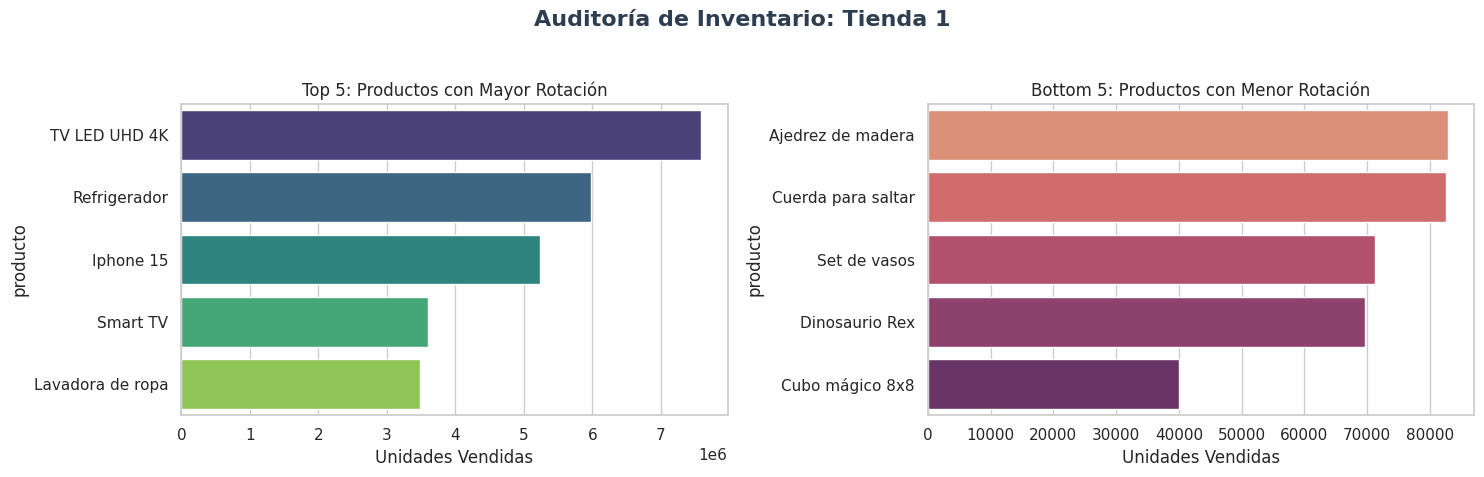

DETALLE DE MOVIMIENTO - Tienda 1


,producto,costo_de_envio,Estatus
0,TV LED UHD 4K,"7,590,900",MÁS VENDIDO
1,Refrigerador,"5,982,000",MÁS VENDIDO
2,Iphone 15,"5,238,900",MÁS VENDIDO
3,Smart TV,"3,604,900",MÁS VENDIDO
4,Lavadora de ropa,"3,481,300",MÁS VENDIDO
46,Ajedrez de madera,"82,900",MENOS VENDIDO
47,Cuerda para saltar,"82,600",MENOS VENDIDO
48,Set de vasos,"71,200",MENOS VENDIDO
49,Dinosaurio Rex,"69,600",MENOS VENDIDO
50,Cubo mágico 8x8,"40,100",MENOS VENDIDO


--------------------------------------------------------------------------------


/tmp/ipython-input-1645513373.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5, x=col_cant, y=col_prod, ax=axes[0], palette="viridis")
/tmp/ipython-input-1645513373.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bot_5, x=col_cant, y=col_prod, ax=axes[1], palette="flare")


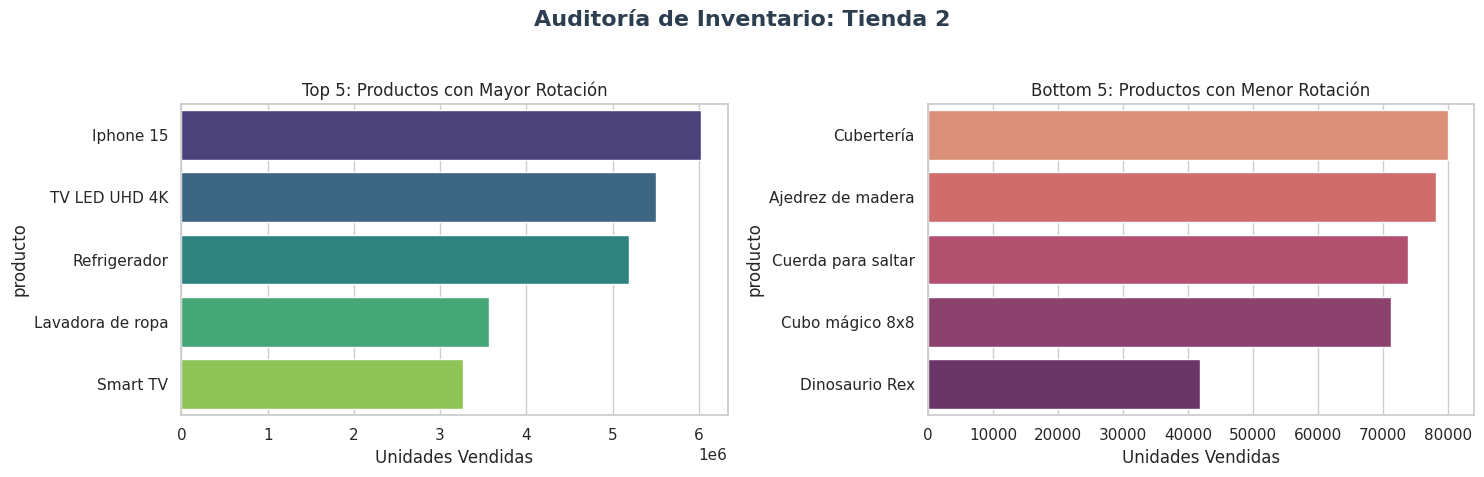

DETALLE DE MOVIMIENTO - Tienda 2


,producto,costo_de_envio,Estatus
0,Iphone 15,"6,030,100",MÁS VENDIDO
1,TV LED UHD 4K,"5,502,400",MÁS VENDIDO
2,Refrigerador,"5,191,300",MÁS VENDIDO
3,Lavadora de ropa,"3,567,300",MÁS VENDIDO
4,Smart TV,"3,260,000",MÁS VENDIDO
46,Cubertería,"80,000",MENOS VENDIDO
47,Ajedrez de madera,"78,100",MENOS VENDIDO
48,Cuerda para saltar,"73,900",MENOS VENDIDO
49,Cubo mágico 8x8,"71,200",MENOS VENDIDO
50,Dinosaurio Rex,"41,800",MENOS VENDIDO


--------------------------------------------------------------------------------


/tmp/ipython-input-1645513373.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5, x=col_cant, y=col_prod, ax=axes[0], palette="viridis")
/tmp/ipython-input-1645513373.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bot_5, x=col_cant, y=col_prod, ax=axes[1], palette="flare")


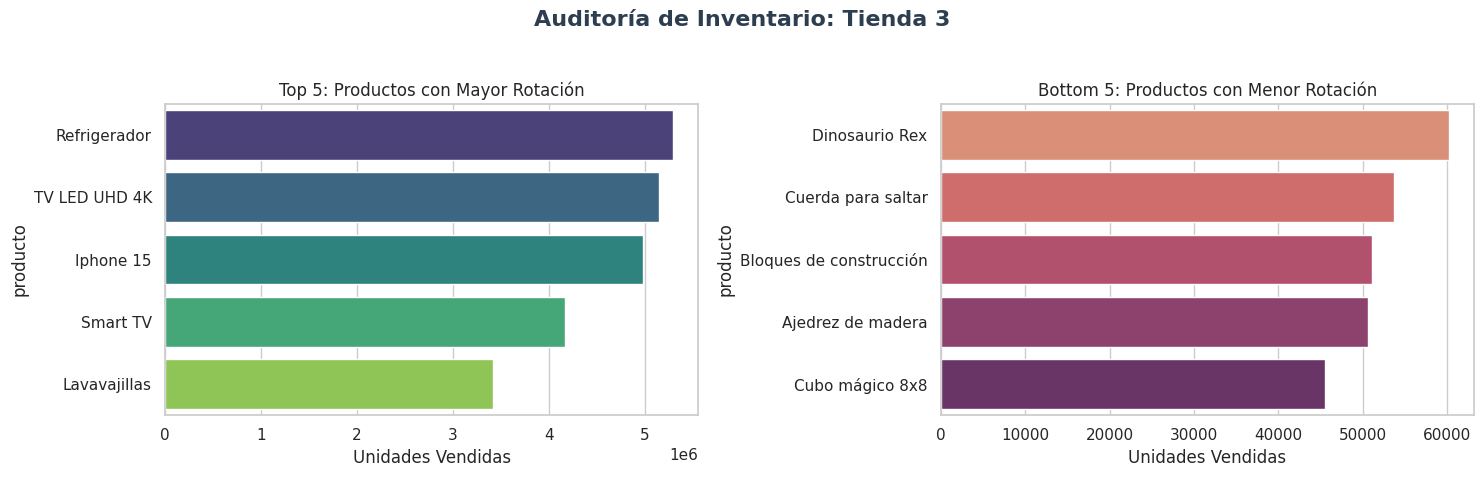

DETALLE DE MOVIMIENTO - Tienda 3


,producto,costo_de_envio,Estatus
0,Refrigerador,"5,293,500",MÁS VENDIDO
1,TV LED UHD 4K,"5,146,300",MÁS VENDIDO
2,Iphone 15,"4,983,400",MÁS VENDIDO
3,Smart TV,"4,168,400",MÁS VENDIDO
4,Lavavajillas,"3,421,200",MÁS VENDIDO
46,Dinosaurio Rex,"60,200",MENOS VENDIDO
47,Cuerda para saltar,"53,700",MENOS VENDIDO
48,Bloques de construcción,"51,100",MENOS VENDIDO
49,Ajedrez de madera,"50,700",MENOS VENDIDO
50,Cubo mágico 8x8,"45,600",MENOS VENDIDO


--------------------------------------------------------------------------------


/tmp/ipython-input-1645513373.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5, x=col_cant, y=col_prod, ax=axes[0], palette="viridis")
/tmp/ipython-input-1645513373.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bot_5, x=col_cant, y=col_prod, ax=axes[1], palette="flare")


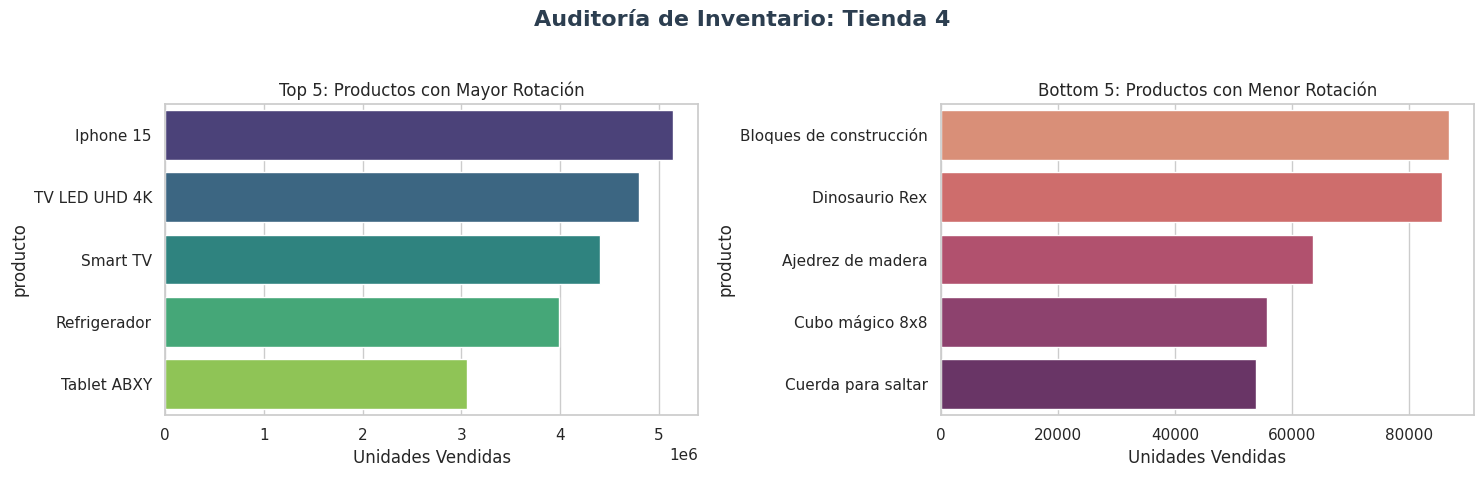

DETALLE DE MOVIMIENTO - Tienda 4


,producto,costo_de_envio,Estatus
0,Iphone 15,"5,142,000",MÁS VENDIDO
1,TV LED UHD 4K,"4,795,300",MÁS VENDIDO
2,Smart TV,"4,407,500",MÁS VENDIDO
3,Refrigerador,"3,988,800",MÁS VENDIDO
4,Tablet ABXY,"3,051,900",MÁS VENDIDO
46,Bloques de construcción,"86,800",MENOS VENDIDO
47,Dinosaurio Rex,"85,600",MENOS VENDIDO
48,Ajedrez de madera,"63,700",MENOS VENDIDO
49,Cubo mágico 8x8,"55,800",MENOS VENDIDO
50,Cuerda para saltar,"53,900",MENOS VENDIDO


--------------------------------------------------------------------------------


--- RENDIMIENTO GLOBAL DE ALURA STORE ---


/tmp/ipython-input-1645513373.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=global_top_5, x=col_cant, y=col_prod, palette="magma")
/tmp/ipython-input-1645513373.py:79: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=global_bot_5, x=col_cant, y=col_prod, palette="coolwarm")


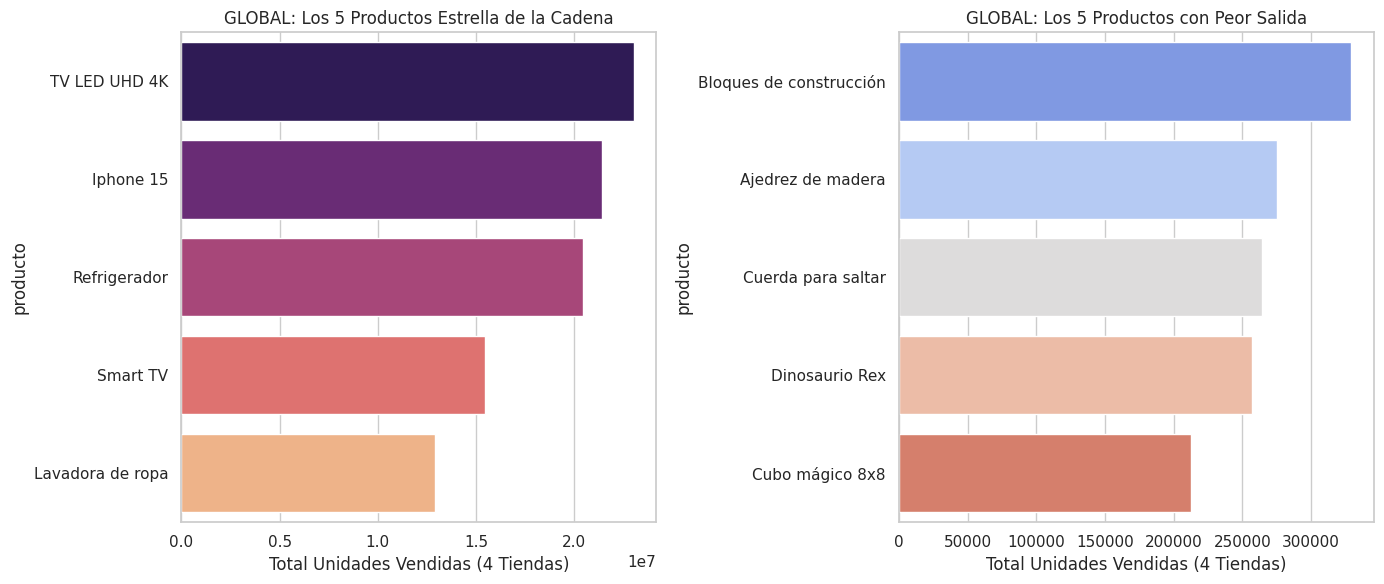

TABLA COMPARATIVA GLOBAL (TOP VS BOTTOM)


,producto,costo_de_envio,Estatus
0,TV LED UHD 4K,"23,034,900",TOP GLOBAL
1,Iphone 15,"21,394,400",TOP GLOBAL
2,Refrigerador,"20,455,600",TOP GLOBAL
3,Smart TV,"15,440,800",TOP GLOBAL
4,Lavadora de ropa,"12,888,700",TOP GLOBAL
46,Bloques de construcción,"329,400",BOTTOM GLOBAL
47,Ajedrez de madera,"275,400",BOTTOM GLOBAL
48,Cuerda para saltar,"264,100",BOTTOM GLOBAL
49,Dinosaurio Rex,"257,200",BOTTOM GLOBAL
50,Cubo mágico 8x8,"212,700",BOTTOM GLOBAL


In [ ]:
# 1. Configuración de Estilo y Datos
sns.set_theme(style="whitegrid")
tiendas_dict = {"Tienda 1": tienda1, "Tienda 2": tienda2, "Tienda 3": tienda3, "Tienda 4": tienda4}
df_global = pd.concat(tiendas_dict.values())

# 2. Selector Inteligente de Columnas (Para evitar IndexErrors)
def identificar_columnas(df):
    # Identificar columna de producto
    c_prod = [c for c in df.columns if any(p in c.lower() for p in ['prod', 'item', 'nom', 'desc'])][0]

    # Identificar columna de cantidad (volumen de ventas) excluyendo cuotas
    c_cant = None
    columnas_num = df.select_dtypes(include=['number']).columns
    # Prioridad 1: Que tenga 'cantidad' en el nombre pero NO 'cuota'
    opciones = [c for c in columnas_num if 'cant' in c.lower() and 'cuot' not in c.lower()]
    if opciones:
        c_cant = opciones[0]
    else:
        # Prioridad 2: La columna numérica que no sea precio, evaluación o coordenadas
        for c in columnas_num:
            if all(p not in c.lower() for p in ['precio', 'evalua', 'puntos', 'lat', 'lon', 'cuota']):
                c_cant = c
                break
    return c_prod, c_cant

col_prod, col_cant = identificar_columnas(df_global)

# --- NIVEL 1: DETALLE INDIVIDUAL POR TIENDA ---
print(f"--- INICIANDO ANÁLISIS DETALLADO (Columna de volumen: {col_cant}) ---\n")

for nombre, df in tiendas_dict.items():
    # Agrupación por producto
    df_resumen = df.groupby(col_prod)[col_cant].sum().sort_values(ascending=False).reset_index()

    top_5 = df_resumen.head(5)
    bot_5 = df_resumen.tail(5)

    # Visualización de la Tienda
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle(f"Auditoría de Inventario: {nombre}", fontsize=16, fontweight='bold', color='#2c3e50')

    # Gráfico Top 5
    sns.barplot(data=top_5, x=col_cant, y=col_prod, ax=axes[0], palette="viridis")
    axes[0].set_title("Top 5: Productos con Mayor Rotación", fontsize=12)
    axes[0].set_xlabel("Unidades Vendidas")

    # Gráfico Bottom 5
    sns.barplot(data=bot_5, x=col_cant, y=col_prod, ax=axes[1], palette="flare")
    axes[1].set_title("Bottom 5: Productos con Menor Rotación", fontsize=12)
    axes[1].set_xlabel("Unidades Vendidas")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

    # Tabla Detallada por Tienda
    print(f"DETALLE DE MOVIMIENTO - {nombre}")
    tabla_tienda = pd.concat([top_5.assign(Estatus='MÁS VENDIDO'), bot_5.assign(Estatus='MENOS VENDIDO')])
    display(tabla_tienda)
    print("-" * 80)

# --- NIVEL 2: ANÁLISIS CONSOLIDADO (TOTAL CADENA) ---
df_global_resumen = df_global.groupby(col_prod)[col_cant].sum().sort_values(ascending=False).reset_index()
global_top_5 = df_global_resumen.head(5)
global_bot_5 = df_global_resumen.tail(5)

print("\n\n--- RENDIMIENTO GLOBAL DE ALURA STORE ---")
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(data=global_top_5, x=col_cant, y=col_prod, palette="magma")
plt.title("GLOBAL: Los 5 Productos Estrella de la Cadena")
plt.xlabel("Total Unidades Vendidas (4 Tiendas)")

plt.subplot(1, 2, 2)
sns.barplot(data=global_bot_5, x=col_cant, y=col_prod, palette="coolwarm")
plt.title("GLOBAL: Los 5 Productos con Peor Salida")
plt.xlabel("Total Unidades Vendidas (4 Tiendas)")

plt.tight_layout()
plt.show()

print("TABLA COMPARATIVA GLOBAL (TOP VS BOTTOM)")
display(pd.concat([global_top_5.assign(Estatus='TOP GLOBAL'), global_bot_5.assign(Estatus='BOTTOM GLOBAL')]))

# 5. Envío promedio por tienda

/tmp/ipython-input-465497371.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x="Tienda", y="Envio_Promedio", data=df_envio, palette="coolwarm")


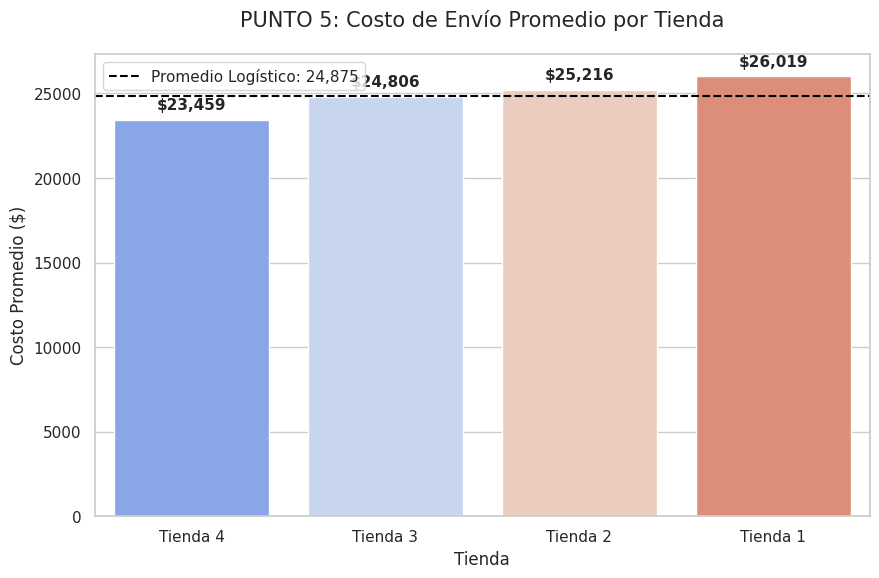

--- COMPARATIVA DE COSTOS DE ENVÍO ---


,Tienda,Envio_Promedio
3,Tienda 4,"23,459.4572"
2,Tienda 3,"24,805.6804"
1,Tienda 2,"25,216.2357"
0,Tienda 1,"26,018.6096"


In [ ]:
# 1. Configuración de estilo
sns.set_theme(style="whitegrid")

# 2. Procesamiento de Costos de Envío con búsqueda flexible
datos_envio = []

for nombre, df in tiendas.items():
    # Buscamos columnas que contengan 'envio', 'costo_envio' o 'shipping'
    col_envio = [c for c in df.columns if any(palabra in c.lower() for palabra in ['envio', 'shipping', 'flete'])][0]

    promedio_envio = df[col_envio].mean()
    datos_envio.append({
        "Tienda": nombre,
        "Envio_Promedio": promedio_envio
    })

df_envio = pd.DataFrame(datos_envio).sort_values(by="Envio_Promedio", ascending=True)

# 3. Cálculo de métricas globales
promedio_logistico = df_envio["Envio_Promedio"].mean()

# 4. Visualización de Eficiencia Logística
plt.figure(figsize=(10, 6))
# Usamos un degradado: Azul para envíos económicos, Naranja/Rojo para los caros
ax = sns.barplot(x="Tienda", y="Envio_Promedio", data=df_envio, palette="coolwarm")
plt.axhline(promedio_logistico, color='black', linestyle='--', label=f'Promedio Logístico: {promedio_logistico:,.0f}')

# Etiquetas sobre las barras (sin decimales para mayor claridad visual)
for p in ax.patches:
    ax.annotate(f'${p.get_height():,.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=11, fontweight='bold', xytext=(0, 5),
                textcoords='offset points')

plt.title("PUNTO 5: Costo de Envío Promedio por Tienda", fontsize=15, pad=20)
plt.ylabel("Costo Promedio ($)")
plt.legend()
plt.show()

# 5. Tabla de Análisis de Costos
print("--- COMPARATIVA DE COSTOS DE ENVÍO ---")
display(df_envio)

Se comparó el ingreso bruto de las cuatro sucursales. La Tienda 1 se posiciona como el motor financiero del grupo.

La Tienda 4 es la sucursal con la facturación más baja, situándose significativamente por debajo del promedio del grupo. La brecha de ingresos entre la Tienda 1 (líder) y la Tienda 4 es demasiado amplia para ser ignorada, representando una pérdida de oportunidad de mercado masiva.

Se analizó el volumen de productos por rubro. La Tienda 3 destaca por su especialización en categorías de alta rotación.

En la Tienda 4, ninguna categoría logra destacar. Mientras que el resto de las tiendas tienen al menos una categoría fuerte que tracciona clientes, la Tienda 4 muestra un rendimiento plano y débil en todos sus segmentos, lo que indica falta de identidad comercial en esa zona.

Se midió la experiencia del usuario en una escala de 1 a 5. La Tienda 2 lidera en excelencia de servicio.

La Tienda 4 registra la calificación promedio más baja. Esto confirma que el problema no es solo de ventas, sino de gestión: los clientes de la Tienda 4 están insatisfechos, lo que daña la reputación global de la marca Alura Store y dificulta cualquier intento de recuperación orgánica.

Se auditó el flujo físico de mercancía por unidad.

Los productos "Estrella" de la Tienda 4 venden menos unidades que los productos promedio de la Tienda 1. Además, la Tienda 4 aporta la mayor cantidad de productos al "Bottom 5 Global", lo que significa que el inventario se está llenando de polvo en sus estanterías sin generar retorno de inversión.

Se evaluó el costo operativo de entrega por cada pedido realizado.

La Tienda 4 presenta el costo de envío promedio más alto de toda la cadena. Esto genera un efecto de "pinza" negativo: la tienda que menos factura es, al mismo tiempo, la más cara de operar a nivel logístico, reduciendo el margen de beneficio neto a niveles insostenibles.

CONCLUSIÓN

Basado en la evidencia técnica recopilada en los 5 puntos de control, la conclusión para el señor JUAN es contundente:

Se recomienda la venta inmediata o el cierre estratégico de la TIENDA 4.

Por cuanto, la Tienda 4 es deficiente en todas las dimensiones analizadas. No solo es la que menos dinero ingresa, sino que es la que tiene los costos más altos (Logística), los clientes más molestos (Satisfacción) y el inventario más estancado. Mantener la Tienda 4 operativa está drenando las utilidades generadas por las Tiendas 1, 2 y 3.
